In [3]:
#import additional libraries
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for splitting the data into training and test set 
from sklearn.model_selection import train_test_split
# For Normalization
from sklearn.preprocessing import MinMaxScaler
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [4]:
# import tensorflow 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.8.0


In [5]:
#Loaing from the course github account 
df=pd.read_csv('https://raw.githubusercontent.com/oluwole-packt/datasets/main/Students-Dropout-Prediction.csv', index_col=0)
df.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19.0,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19.0,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16.0,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16.0,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16.0,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [6]:
df.corr()

,access,tests,exam,project,assignments,result_points,graduate,year
access,1.000000,0.435423,0.283692,0.480523,0.604773,0.508932,0.391959,0.288283
tests,0.435423,1.000000,0.567824,0.639007,0.506493,0.762576,0.615791,0.208932
exam,0.283692,0.567824,1.000000,0.742922,0.275860,0.808610,0.744239,0.110891
project,0.480523,0.639007,0.742922,1.000000,0.542468,0.901135,0.800602,0.309654
assignments,0.604773,0.506493,0.275860,0.542468,1.000000,0.524476,0.365950,0.644541
result_points,0.508932,0.762576,0.808610,0.901135,0.524476,1.000000,0.800491,0.198972
graduate,0.391959,0.615791,0.744239,0.800602,0.365950,0.800491,1.000000,0.055629
year,0.288283,0.208932,0.110891,0.309654,0.644541,0.198972,0.055629,1.000000


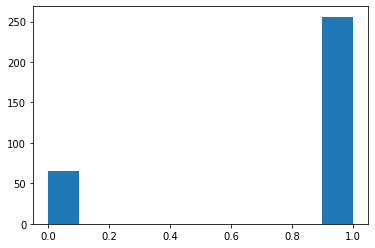

In [7]:
plt.hist(df['graduate'])
plt.show()

In [8]:
df[(df['graduate']==0) & (df['result_grade']!="FX")]

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year


In [9]:
df.isnull().sum()

access           0
tests            0
tests_grade      0
exam             0
project          0
project_grade    0
assignments      0
result_points    0
result_grade     0
graduate         0
year             0
acad_year        0
dtype: int64

In [10]:
df.drop(columns=['acad_year'], inplace=True)

In [11]:
#Converting categorical variables to numeric values 
df = pd.get_dummies(df, drop_first=True)
df.head()

,access,tests,exam,project,assignments,result_points,graduate,year,tests_grade_A,tests_grade_B,...,project_grade_B,project_grade_C,project_grade_D,project_grade_E,project_grade_FX,result_grade_B,result_grade_C,result_grade_D,result_grade_E,result_grade_FX
0,1256,57.00,19.0,91.54,40.0,189.92,1,2019,1,0,...,0,0,0,0,0,0,0,0,0,0
1,985,42.87,19.0,75.96,13.7,189.43,1,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1455,54.50,16.0,96.79,40.0,188.91,1,2019,1,0,...,0,0,0,0,0,0,0,0,0,0
3,998,54.50,16.0,93.36,40.0,186.85,1,2019,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1347,55.00,16.0,92.86,39.0,186.38,1,2019,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.corr()

,access,tests,exam,project,assignments,result_points,graduate,year,tests_grade_A,tests_grade_B,...,project_grade_B,project_grade_C,project_grade_D,project_grade_E,project_grade_FX,result_grade_B,result_grade_C,result_grade_D,result_grade_E,result_grade_FX
access,1.000000,0.435423,0.283692,0.480523,0.604773,0.508932,0.391959,0.288283,0.060167,0.045216,...,0.120768,0.002175,0.057643,-0.087095,-0.376569,0.191567,0.061061,0.057987,-0.041330,-0.391959
tests,0.435423,1.000000,0.567824,0.639007,0.506493,0.762576,0.615791,0.208932,0.202954,0.232542,...,0.109402,0.085460,-0.003746,-0.125199,-0.550327,0.284081,0.193292,0.022342,-0.057721,-0.615791
exam,0.283692,0.567824,1.000000,0.742922,0.275860,0.808610,0.744239,0.110891,0.119838,0.096565,...,0.185775,0.111384,0.020095,-0.052286,-0.750088,0.274136,0.226526,0.028906,0.025987,-0.744239
project,0.480523,0.639007,0.742922,1.000000,0.542468,0.901135,0.800602,0.309654,0.073308,0.017405,...,0.230589,0.094112,0.013197,-0.044233,-0.917152,0.274973,0.265601,0.117948,0.037157,-0.800602
assignments,0.604773,0.506493,0.275860,0.542468,1.000000,0.524476,0.365950,0.644541,0.154043,0.068968,...,0.093133,-0.033024,0.032051,-0.035148,-0.346964,0.347263,0.005229,-0.033391,-0.062116,-0.365950
result_points,0.508932,0.762576,0.808610,0.901135,0.524476,1.000000,0.800491,0.198972,0.097219,0.066345,...,0.209956,0.090597,0.002534,-0.067703,-0.844341,0.302982,0.285323,0.062955,-0.035686,-0.800491
graduate,0.391959,0.615791,0.744239,0.800602,0.365950,0.800491,1.000000,0.055629,0.115411,0.045875,...,0.254889,0.181135,0.024870,-0.243140,-0.811075,0.218998,0.316952,0.226609,0.164747,-1.000000
year,0.288283,0.208932,0.110891,0.309654,0.644541,0.198972,0.055629,1.000000,0.079520,0.036113,...,0.068516,-0.017370,0.020359,0.052204,-0.109695,0.123408,-0.026838,-0.064708,0.087057,-0.055629
tests_grade_A,0.060167,0.202954,0.119838,0.073308,0.154043,0.097219,0.115411,0.079520,1.000000,-0.070804,...,-0.124264,-0.010019,-0.047055,-0.038900,-0.033149,-0.060385,-0.144068,-0.064735,-0.026421,-0.115411
tests_grade_B,0.045216,0.232542,0.096565,0.017405,0.068968,0.066345,0.045875,0.036113,-0.070804,1.000000,...,-0.009682,-0.093023,-0.007503,-0.052504,-0.001698,0.228062,-0.096461,-0.139023,-0.063693,-0.045875


In [13]:
# We split the attributes and labels into X and y variables 
X = df.drop("graduate", axis=1)
y = df["graduate"]

In [14]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head()

,access,tests,exam,project,assignments,result_points,year,tests_grade_A,tests_grade_B,tests_grade_C,...,project_grade_B,project_grade_C,project_grade_D,project_grade_E,project_grade_FX,result_grade_B,result_grade_C,result_grade_D,result_grade_E,result_grade_FX
0,0.522488,0.837004,0.95,0.871810,1.0000,0.807003,0.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.408575,0.629515,0.95,0.723429,0.3425,0.804921,0.25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606137,0.800294,0.80,0.921810,1.0000,0.802711,0.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414040,0.800294,0.80,0.889143,1.0000,0.793958,0.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.560740,0.807636,0.80,0.884381,0.9750,0.791961,0.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Create training and test sets
#We set the random state to ensure reproduciblility 

X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    y, 
                                                    test_size=0.2, random_state=15) 

In [16]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
#model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 2s 96ms/step - loss: 0.6009 - accuracy: 0.7010 - val_loss: 0.5585 - val_accuracy: 0.8654
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5114 - accuracy: 0.9608 - val_loss: 0.4834 - val_accuracy: 0.9231
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4405 - accuracy: 0.9853 - val_loss: 0.4221 - val_accuracy: 0.9231
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3818 - accuracy: 0.9853 - val_loss: 0.3728 - val_accuracy: 0.9231
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3358 - accuracy: 0.9804 - val_loss: 0.3328 - val_accuracy: 0.9231
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2961 - accuracy: 0.9755 - val_loss: 0.2992 - val_accuracy: 0.9231
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.9755 - val_loss: 0.2710 - val_accuracy: 0.9231
Epoch 8/50
7/7 [=================

In [17]:
y_pred = model.predict(X_test)
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

In [18]:
# Evaluate the Keras model
eval_model=model.evaluate(X_test, y_test)
eval_model

3/3 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 1.0000


[0.016353866085410118, 1.0]

In [19]:
eval = confusion_matrix(y_test, y_pred)
print(eval)

[[16  0]
 [ 0 49]]
